# [Dacon_와인 품질 분류](https://dacon.io/competitions/open/235610/overview/description)
- 평가산식: 정확도
- 변수 종류
    - index 구분자
    - quality 품질
    - fixed acidity 산도
    - volatile acidity 휘발성산
    - citric acid 시트르산
    - residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
    - chlorides 염화물
    - free sulfur dioxide 독립 이산화황
    - total sulfur dioxide 총 이산화황
    - density 밀도
    - pH 수소이온농도
    - sulphates 황산염
    - alcohol 도수
    - type 종류

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

## 1. EDA

In [2]:
train = pd.read_csv(os.getcwd() + '/data/wine/train.csv').drop('index', axis=1)
display(train.head())
print(train.shape)
print(train.info())

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


(5497, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB
None


In [3]:
train.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


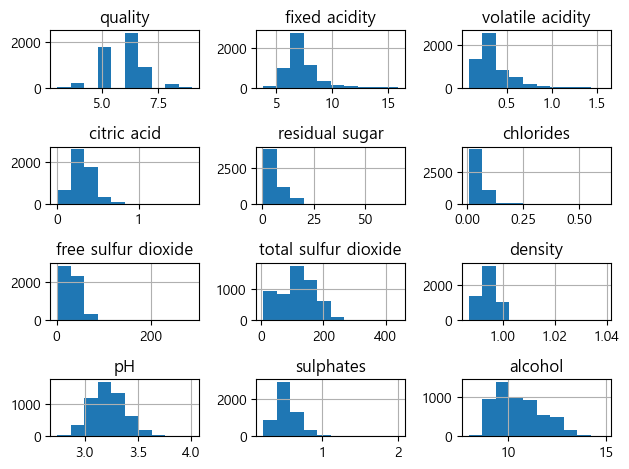

In [4]:
train.hist()
plt.tight_layout();

In [13]:
train.quality.value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

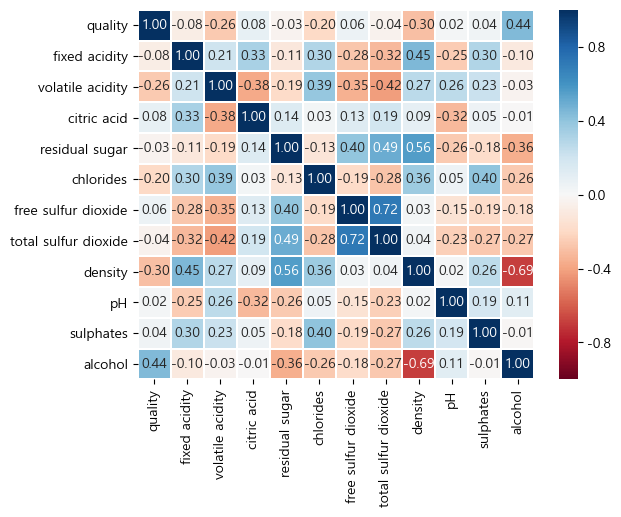

In [16]:
train_corr = train.corr()
sns.heatmap(train_corr, vmin=-1, vmax=1, annot=True, fmt='.2f', linewidth=0.1, cmap='RdBu');

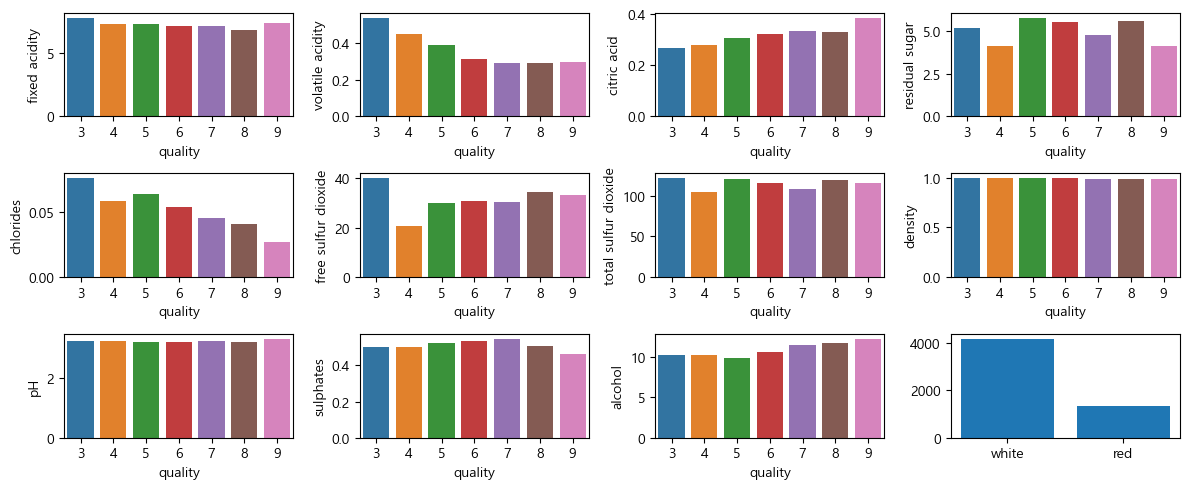

In [31]:
X_features = train.drop('quality', axis=1).columns
fig, ax = plt.subplots(figsize=(12, 5), ncols=4, nrows=3)
for i, feature in enumerate(X_features):
    row = int(i/4)
    col = i%4
    if feature == 'type':
        ax[row][col].bar(train.type.value_counts().index, train.type.value_counts().values)
    else:
        sns.barplot(data=train, x='quality', y=feature, ax=ax[row][col], ci=None)
    plt.tight_layout();

In [17]:
# 품질에 따른 각 칼럼별 평균
train.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.811538,0.538077,0.266923,5.203846,0.076500,40.096154,121.461538,0.995713,3.250385,0.500000,10.251923
4,7.269892,0.447285,0.280323,4.145430,0.059247,20.553763,104.811828,0.994730,3.228602,0.500484,10.180376
5,7.329195,0.387855,0.308043,5.792422,0.064417,30.174217,120.370805,0.995843,3.213384,0.525017,9.846875
6,7.166743,0.312301,0.323411,5.535141,0.053932,30.969578,115.357616,0.994527,3.219611,0.532686,10.606015
7,7.123972,0.289724,0.332987,4.748918,0.045352,30.457251,108.178571,0.993122,3.228333,0.546786,11.383864
8,6.839474,0.292730,0.330263,5.581579,0.041105,34.585526,119.421053,0.992544,3.216711,0.506184,11.680921
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


[해석]
1. 결측치 존재여부
    - 본 데이터에서 결측치는 없다.
1. 데이터 타입
    - 종속변수인 quality는 int형, type은 object형, 나머지 독립변수는 float형으로 구성되었다.
1. 종속변수와 독립변수의 상관관계
    - 대체적으로 높은 상관성을 보이는 관계는 없다.
1. 독립변수 상관관계
    - 다중공선성을 의심할만큼의 높은 상관성(0.9 이상)을 보이는 관계는 없다.
1. 유의할 점
    - 최종 예측 대상인 quality 변수에 데이터 불균형 문제가 일어날 수 있기에 오버샘플링 또는 언더샘플일을 고려할 수 있다.
    - type 변수는 범주형이므로 원-핫 인코딩을 수행하여 더미변수로 변환한다.
    - 나머지 수치형 독립변수는 서로 값의 범위가 다르므로 이를 통일하기 위해 스케일링 작업이 필요할 수 있다.

## 2. 통계분석
### 1) 적합성 검정
- 귀무가설: 와인 품질의 비율은 모두 동일하다.
- 대립가설: 와인 품질의 비율은 모두 동일하지 않다.

In [46]:
import scipy.stats as stats
table = train.quality.value_counts()
stats.chisquare(table) # 귀무가설 기각

Power_divergenceResult(statistic=7168.679279607058, pvalue=0.0)

### 2) 독립성 검정
- 귀무가설: 와인 품질과 와인 종류는 서로 연관성이 없다.
- 대립가설: 와인 품질과 와인 종류는 서로 연관성이 있다.

In [49]:
table2 = pd.crosstab(train['quality'], train['type'])
chi, p, df, expect = stats.chi2_contingency(table2)
print('통계량:', chi)
print('p-value:', p) # 귀무가설 기각

통계량: 104.90185862771087
p-value: 2.3762018921679568e-20


### 3) 이원배치 분산분석(정규성, 등분산성을 만족한다고 가정함)
- 주효과 검정(quality)
    - 귀무가설: 와인 품질에 따른 알코올 도수에 차이가 없다.
    - 귀무가설: 와인 품질에 따른 알코올 도수에 차이가 있다.
- 주효과 검정(type)
    - 귀무가설: 와인 종류에 따른 알코올 도수에 차이가 없다.
    - 귀무가설: 와인 종류에 따른 알코올 도수에 차이가 있다.
- 상호작용 검정
    - 귀무가설: 와인 품질과 와인 종류에 상호작용 효과가 없다.
    - 귀무가설: 와인 품질과 와인 종류에 상호작용 효과가 있다.

In [62]:
# 데이터 생성
anova_df = train[['quality', 'type', 'alcohol']]

# 이원배치 분산분석 시행
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'alcohol ~ C(quality) + C(type) + C(quality):C(type)'
model = ols(formula, anova_df).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(quality),2087.083014,6.0,314.072882,1.547271e-296
C(type),5.631005,1.0,5.084262,2.418323e-02
C(quality):C(type),20.135200,6.0,3.030028,5.852257e-03
Residual,6073.729960,5484.0,NaN,NaN


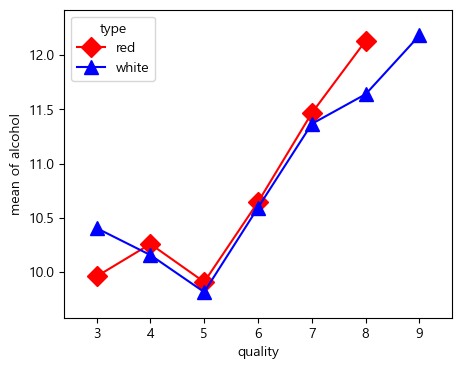

In [67]:
from statsmodels.graphics.factorplots import interaction_plot
quality = anova_df['quality']
types = anova_df['type']
alcohol = anova_df['alcohol']
fig, ax = plt.subplots(figsize=(5,4))
fig = interaction_plot(quality, types, alcohol, colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax)

### 4) 비계층적 군집분석(K-Means)

In [51]:
X.iloc[:, :-1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9
...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1
5493,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0
5494,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3
5495,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5


In [55]:
# 스케일링
from sklearn.preprocessing import StandardScaler
X = pd.get_dummies(train.drop('quality',axis=1), drop_first=True)
num_cols = X.drop('type_white',axis=1).columns.tolist()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.iloc[:, :-1])
X[num_cols] = X_scaled
X.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,-1.250611,2.186377,-1.78194,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,1
1,1.234899,1.665574,-1.23056,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,0
2,0.535849,-0.785265,0.49250,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,1


In [56]:
# 콜린스키 하라바츠 스코어
from sklearn.metrics import calinski_harabasz_score
for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels=kmeans_model.labels_
    print(calinski_harabasz_score(X, labels))

1596.9405185136388
1610.1565790421805
1408.1045990808261
1226.6986257767942
1110.9724622814415
1021.9713698301971
941.6110239276572
874.6627381557165


k값이 3일 때 값이 가장 높지만 이 값만 가지고 k값을 확정하기 어려우므로 바로 아래에서 엘보우 기법을 이용하였다.

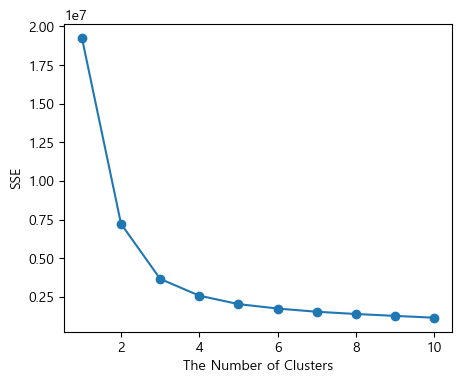

[19272944.774555225, 7228906.986280482, 3663471.2666515466, 2576230.3056523036, 2031830.391551077, 1744228.6251835814, 1536861.5663045852, 1391044.430423962, 1269394.7463540644, 1150009.7848439442]


In [57]:
# 엘보우 기법
from sklearn.cluster import KMeans
X = pd.get_dummies(train.drop('quality',axis=1), drop_first=True)
def elbow(X):
    sse=[]
    for i in range(1,11):
        km = KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.figure(figsize=(5,4))
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
    
elbow(X)

- 엘보우 메서드를 함수로 만들어 시각화하였다. 
- k값이 3에서 4로 넘어갈 때 기울기 소실 문제가 발생하므로, 해당 데이터에서는 3~4개의 군집이 적절함을 알 수 있다.

In [66]:
# 최적의 k로 K-Means 군집화 실행
km = KMeans(n_clusters=4, random_state=1)
km.fit(X)

# 할당된 군집을 train 데이터에 추가
new_labels = km.labels_
cluster_df = X.copy()
cluster_df['cluster'] = new_labels
cluster_df.groupby(['cluster']).mean().drop('type_white', axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
cluster,,,,,,,,,,,
0,6.946791,0.313544,0.312480,4.077071,0.048044,25.180863,98.133606,0.993041,3.209609,0.506844,10.981811
1,6.967788,0.290572,0.352190,9.355395,0.051636,50.547543,196.991453,0.996318,3.185855,0.512970,9.702404
2,6.901033,0.281523,0.338388,6.693625,0.048077,36.677096,143.907320,0.994401,3.193878,0.491730,10.408223
3,8.252385,0.496609,0.271084,2.436557,0.082096,12.664788,33.742411,0.996166,3.299167,0.636973,10.589535


In [67]:
# 실루엣 계수를 통한 군집 평가

# cluster_df의 모든 개별 데이터에 실루엣 계수 값을 구함.
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(cluster_df, cluster_df['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# cluster_df에 실루엣 계수 칼럼 추가
cluster_df['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(cluster_df, cluster_df['cluster'])
print('Silhouette Analysis Score: {0:.3f}'.format(average_score))
cluster_df.head(3)

silhouette_samples() return 값의 shape (5497,)
Silhouette Analysis Score: 0.450


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white,cluster,silhouette_coeff
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1,0,0.487109
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0,3,0.686262
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1,2,0.415564


In [68]:
cluster_df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.442633
1    0.393580
2    0.366358
3    0.631990
Name: silhouette_coeff, dtype: float64

## 3. 머신러닝
Q: 오버샘플링 과정을 설명하시오
- 오버샘플링 기법은 소수의 레이블을 지닌 데이터세트를 다수 레이블을 지닌 데이터세트의 수만큼 증식시켜 학습에 사용하기 위한 충분한 양과 비율의 데이터를 확보하는 기법이다. 데이터 손실이 없어 일반적으로 언더 샘플링보다 성능이 유리하여 주로 사용된다.
- 본 분석에서는 랜덤 오버 샘플링 기법을 이용한 데이터세트와 SMOTE 기법을 이용한 데이터세트 모두 이용해 가장 성능이 좋은 모델로 선정한다.

In [4]:
# 데이터 분할
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X = train.copy().drop('quality', axis=1)
X['type'] = pd.get_dummies(train['type'], drop_first=True)
y = train.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# 스케일링
scaler = StandardScaler()
X_train.iloc[:, :-1] = scaler.fit_transform(X_train.iloc[:, :-1])
X_test.iloc[:, :-1] = scaler.transform(X_test.iloc[:, :-1])
X_test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3847, 12)
(1650, 12)
(3847,)
(1650,)


In [6]:
# 클래스 불균형 확인
y_train.value_counts()

6    1691
5    1251
7     647
4     130
8     106
3      18
9       4
Name: quality, dtype: int64

In [5]:
# 클래스 불균형 처리
from imblearn.over_sampling import RandomOverSampler, SMOTE

ro = RandomOverSampler()
X_train_resample, y_train_resample = ro.fit_resample(X_train, y_train)
print('<랜덤오버샘플링>\n',pd.Series(y_train_resample).value_counts())

sm = SMOTE()
X_train_sm, y_train_sm = ro.fit_resample(X_train, y_train)
print('<SMOTE>\n',pd.Series(y_train_sm).value_counts())

Using TensorFlow backend.


<랜덤오버샘플링>
 7    1691
6    1691
5    1691
4    1691
3    1691
9    1691
8    1691
dtype: int64
<SMOTE>
 7    1691
6    1691
5    1691
4    1691
3    1691
9    1691
8    1691
dtype: int64


In [7]:
# 모델 구현(랜덤오버샘플링)
from sklearn.ensemble import RandomForestClassifier
import time

start_time = time.time()
rfr_clf = RandomForestClassifier()
rfr_clf.fit(X_train_resample, y_train_resample)
end_time = time.time()
pred = rfr_clf.predict(X_test)
print('train 정확도: ', rfr_clf.score(X_train_resample, y_train_resample))
print('test 정확도: ', accuracy_score(y_test, pred))
print('time:', end_time - start_time, 'sec')

train 정확도:  1.0
test 정확도:  0.6375757575757576
time: 3.622311592102051 sec


In [8]:
# 모델 구현(smote)
from sklearn.ensemble import RandomForestClassifier
import time

start_time = time.time()
rfr_clf = RandomForestClassifier()
rfr_clf.fit(X_train_sm, y_train_sm)
end_time = time.time()
pred = rfr_clf.predict(X_test)
print('train 정확도: ', rfr_clf.score(X_train_sm, y_train_sm))
print('test 정확도: ', accuracy_score(y_test, pred))
print('time:', end_time - start_time, 'sec')

train 정확도:  1.0
test 정확도:  0.636969696969697
time: 5.97501802444458 sec


[해석]
- 랜덤오버샘플링을 이용한 결과와 SMOTE를 이용한 결과 모두 과적합이 일어난 것을 알 수 있다.
- 따라서 데이터를 추가로 전처리하거나 그리드서치를 통해 최적의 하이퍼 파라미터를 찾는 과정이 필요할 것으로 사료된다.
- test 데이터세트의 정확도는 랜덤오버샘플링을 이용한 모델이 더 높았으며 속도 측면에서는 SMOTE를 이용한 모델이 더 우수했다.

## 4. 예측값 도출

In [11]:
test = pd.read_csv(os.getcwd() + '/data/wine/test.csv').drop('index', axis=1)
display(test.head(3))
print(test.shape)
print(test.info())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.9938,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.0004,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.9948,3.19,0.69,9.4,white


(1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  type                  1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB
None


In [12]:
test['type'] = pd.get_dummies(test['type'], drop_first=True)
test.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.9938,2.90,0.38,11.6,1
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.0004,3.06,0.49,9.0,0
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.9948,3.19,0.69,9.4,1


In [18]:
pred = rfr_clf.predict(test)
sub_df = pd.read_csv(os.getcwd() + '/data/wine/sample_submission.csv')
sub_df['quality'] = pred
sub_df.to_csv(os.getcwd() + '/data/wine/result.csv', index=False)